In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x = pd.read_csv("./fashion-mnist_test.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]

In [4]:
X.shape,y.shape

((10000, 784), (10000,))

In [5]:
X_train = X[:8000,:]
X_val = X[8000:,:]
y_train = y[:8000]
y_val = y[8000:]

In [38]:
IMG_SIZE = 28*28
H1_SIZE = 256
H2_SIZE = 64
OUT_SIZE = 10
BATCH_SIZE = 256
EPOCH = 50
ALPHA = 0.0003

In [7]:
def accuracy(pred,y):
    return ( 100.0* np.sum(pred==y) / y.shape[0])

In [8]:
def initial_weights():
    np.random.seed(0)
    model = {}
    model['W1'] = np.random.randn(IMG_SIZE,H1_SIZE)/ np.sqrt(IMG_SIZE)
    model['B1'] = np.zeros((1,H1_SIZE))
    model['W2'] = np.random.randn(H1_SIZE,H2_SIZE)/ np.sqrt(H1_SIZE)
    model['B2'] = np.zeros((1,H2_SIZE))
    model['W3'] = np.random.randn(H2_SIZE,OUT_SIZE)/ np.sqrt(H2_SIZE)
    model['B3'] = np.zeros((1,OUT_SIZE))
    return model

In [9]:
def forward_prop(model,x):
    z1 = x.dot(model['W1']) + model['B1']
    a1 = np.tanh(z1)
    z2 = a1.dot(model['W2']) + model['B2']
    a2 = np.tanh(z2)
    z3 = a2.dot(model['W3']) + model['B3']
    h_x = np.exp(z3)
    y_out = h_x/ np.sum(h_x, axis=1, keepdims=True)
    return a1, a2, y_out

In [10]:
def back_prop(model, x ,a1 , a2, y, y_out):
    delta4 = y_out
    delta4[range(y.shape[0]), y] -= 1
    dw3 = (a2.T).dot(delta4)
    db3 = np.sum(delta4, axis = 0)
    delta3 = (1 - np.square(a2))*delta4.dot(model['W3'].T)
    dw2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis = 0)
    delta2 = (1 - np.square(a1))*delta3.dot(model['W2'].T)
    dw1 = (x.T).dot(delta2)
    db1 = np.sum(delta2, axis = 0)
    
    model['W1'] += -ALPHA*dw1
    model['B1'] += -ALPHA*db1
    model['W2'] += -ALPHA*dw2
    model['B2'] += -ALPHA*db2
    model['W3'] += -ALPHA*dw3
    model['B3'] += -ALPHA*db3
    
    return model

In [11]:
def loss(model, p, y):
    correct_logprobs = -np.log(p[range(y.shape[0]),y])
    l = np.sum(correct_logprobs)
    
    return (1.0/y.shape[0]) * l

In [12]:
def predict(y_out):
    return np.argmax(y_out, axis = 1)

In [48]:
def main():
    training_loss = []
    val_loss = []
    val_acc = []
    model = initial_weights()
    for ix in range(EPOCH):
        print ("\nEpoch : %d" %(ix+1))
        count = 0
        while (count+BATCH_SIZE) < y_train.shape[0]:
            batch_data = X_train[count:(count+BATCH_SIZE),:]
            batch_labels = y_train[count:(count+BATCH_SIZE),]
            count += BATCH_SIZE
            
            a1, a2 , p = forward_prop(model, batch_data)
            model = back_prop(model,batch_data,a1,a2,batch_labels,p)
        
        _,_, p = forward_prop(model, X_train)
        training_loss.append(loss(model,p,y_train))
        print ('training_loss : % .3f' % (loss(model,p,y_train)))
        _,_,p = forward_prop(model, X_val)
        pred = predict(p)
        val_loss.append(loss(model,p,y_val))
        val_acc.append(accuracy(pred,y_val))
        print ('val_accuracy : % .3f' % (accuracy(pred,y_val)))
        print ('val_loss : % .3f' % loss(model,p,y_val))
    print("*************Completed***********")
    
    return training_loss,val_loss,val_acc

In [49]:
training_loss,val_loss,val_acc = main()


Epoch : 1
training_loss :  1.019
val_accuracy :  66.750
val_loss :  1.021

Epoch : 2
training_loss :  0.802
val_accuracy :  72.000
val_loss :  0.801

Epoch : 3
training_loss :  0.708
val_accuracy :  74.750
val_loss :  0.704

Epoch : 4
training_loss :  0.650
val_accuracy :  76.350
val_loss :  0.645

Epoch : 5
training_loss :  0.609
val_accuracy :  78.400
val_loss :  0.603

Epoch : 6
training_loss :  0.579
val_accuracy :  79.550
val_loss :  0.574

Epoch : 7
training_loss :  0.555
val_accuracy :  80.350
val_loss :  0.551

Epoch : 8
training_loss :  0.537
val_accuracy :  80.900
val_loss :  0.534

Epoch : 9
training_loss :  0.521
val_accuracy :  81.400
val_loss :  0.520

Epoch : 10
training_loss :  0.508
val_accuracy :  82.150
val_loss :  0.509

Epoch : 11
training_loss :  0.496
val_accuracy :  82.250
val_loss :  0.499

Epoch : 12
training_loss :  0.486
val_accuracy :  82.200
val_loss :  0.491

Epoch : 13
training_loss :  0.477
val_accuracy :  82.650
val_loss :  0.484

Epoch : 14
training_

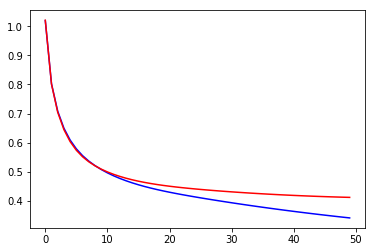

In [50]:
plt.figure(0)
plt.plot(training_loss,color='blue')
plt.plot(val_loss,color='red')
plt.show()

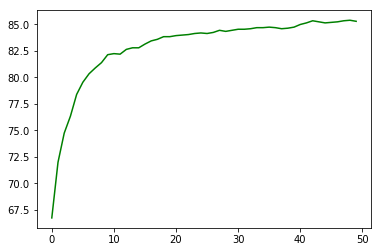

In [51]:
plt.figure(1)
plt.plot(val_acc,color='green')
plt.show()